/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

['s1_word', 's2_word', 's1_pic', 's2_pic']
['s1_word', 's2_word', 's1_pic', 's2_pic']
a_mean        0.32
v1_mean        NaN
v2_mean      -0.72
ndt_mean     -0.14
alpha_mean    0.17
Name: ave_['v1_mean'], dtype: float64
<class 'matplotlib.axes._subplots.AxesSubplot'>
['s1_word', 's2_word', 's1_pic', 's2_pic']
['s1_word', 's2_word', 's1_pic', 's2_pic']
a_mean       -0.39
v1_mean      -0.72
v2_mean        NaN
ndt_mean      0.16
alpha_mean   -0.17
Name: ave_['v2_mean'], dtype: float64
<class 'matplotlib.axes._subplots.AxesSubplot'>
['s1_word', 's2_word', 's1_pic', 's2_pic']
['s1_word', 's2_word', 's1_pic', 's2_pic']
a_mean         NaN
v1_mean       0.32
v2_mean      -0.39
ndt_mean     -0.16
alpha_mean    0.32
Name: ave_['a_mean'], dtype: float64
<class 'matplotlib.axes._subplots.AxesSubplot'>
['s1_word', 's2_word', 's1_pic', 's2_pic']
['s1_word', 's2_word', 's1_pic', 's2_pic']
a_mean       -0.16
v1_mean      -0.14
v2_mean       0.16
ndt_mean       NaN
alpha_mean    0.48
Name: ave_['ndt_mea

/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_frame=empty_frame.append(df_filtered)
/tmp/ipykernel_90880/1944294147.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mean_frame = mean_frame.append(empty_frame.loc['ave_'+str(par)])


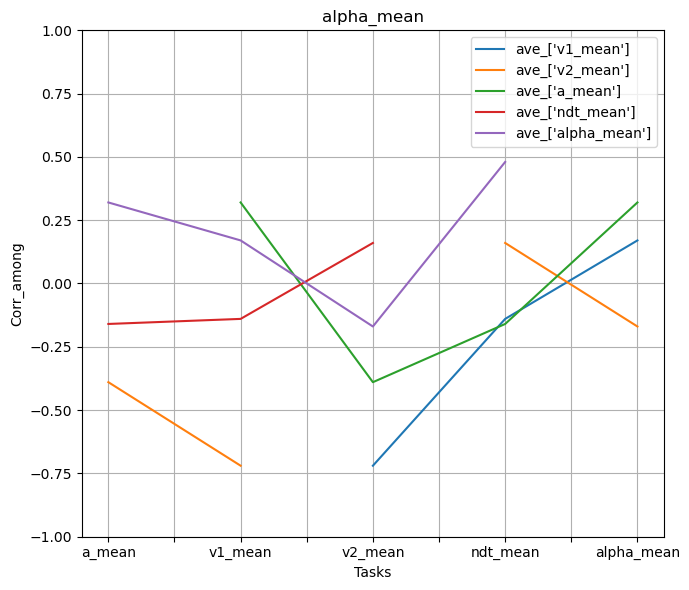

In [17]:
import pandas as pd
import glob
import numpy as np
folder_path = './'
file_list = np.array(glob.glob(folder_path + "/*.xlsx"))
main_dataframe = pd.DataFrame(pd.read_excel(file_list[0]))


mean_frame = pd.DataFrame()
from pandas import ExcelWriter
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10, 20))
#ax = ax.flatten()
#k=0
colum=['Unnamed: 0','v1_mean',
 'v2_mean',
 'a_mean',
 'ndt_mean',
 'alpha_mean']


mylist =['v1_mean',
 'v2_mean',
 'a_mean',
 'ndt_mean',
 'alpha_mean']

task_name = ['s1_word','s2_word','s1_pic','s2_pic']

for par in mylist:
    par = [par]
    empty_frame = pd.DataFrame()
    a=0
    for i in file_list: 
        df = pd.DataFrame(pd.read_excel(i))
        df=df[colum]
        task_n = task_name[a]
        df['task']=task_n
        df_filtered = df[df['Unnamed: 0'].isin(par)]
        empty_frame=empty_frame.append(df_filtered)
        a+=1

    
    ind_list = list(empty_frame["task"])
    print(ind_list)
    empty_frame.index = list(empty_frame["task"])


    column_to_move = empty_frame.pop("a_mean")
    empty_frame.insert(0, "a_mean", column_to_move)

    


    #empty_frame = empty_frame.drop(par, axis=1)
    empty_frame = empty_frame.drop('Unnamed: 0', axis=1)

    print(list(empty_frame.index))
   
    empty_frame = empty_frame.drop('task', axis=1)
    new_row=(round(empty_frame.mean(),2))
    empty_frame.loc[len(empty_frame)] = new_row
    empty_frame.index = ['s1_word', 's1_word', 's1_word', 's1_word','ave_'+str(par)]


    print(empty_frame.loc['ave_'+str(par)])
    
#df.plot(subplots=True, layout=(1,2))
    mean_frame = mean_frame.append(empty_frame.loc['ave_'+str(par)])
    axs=empty_frame.loc['ave_'+str(par)].T.plot(figsize=(7, 6))
    
    print(type(axs))
    
    #ax[k].axs
    axs.set_ylim(-1, 1)
    #axs[a].plot(x, y,'.')
    axs.set_title(par[0])
    axs.set_xlabel('Tasks')
    axs.set_ylabel('Corr_among')

    k+=1
    plt.grid()

    #plt.savefig("./{}_study1_EZ_averagr_corr_among.png".format(par[0]), dpi=600, bbox_inches='tight')
    plt.tight_layout()



#empty_frame.plot()
plt.legend()

plt.show()



    #empty_frame.loc['average'].to_csv(par[0]+'EZ_average.csv')
mean_frame.to_csv('EZ_average_all.csv')